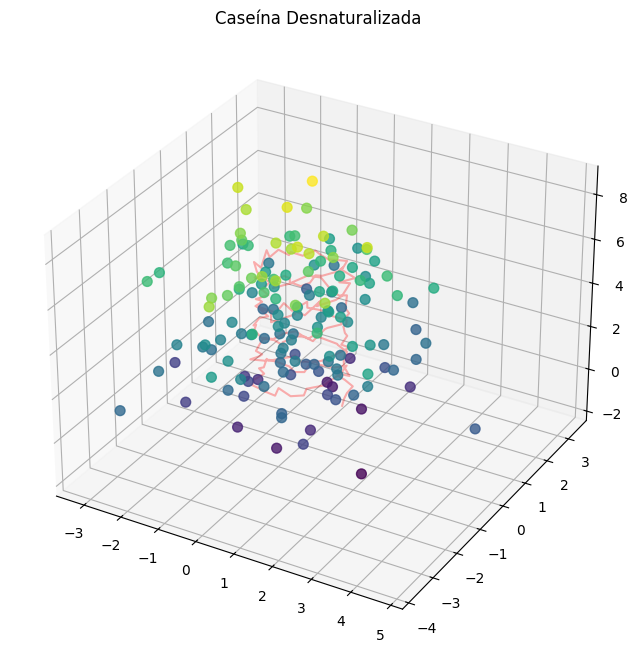

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulación de la estructura de la caseína (simplificada)
def generate_protein_structure(num_residues=100):
    """Genera una estructura proteica simplificada en 3D"""
    np.random.seed(42)
    
    # Generar una hélice alfa inicial
    t = np.linspace(0, 10*np.pi, num_residues)
    x = np.cos(t)
    y = np.sin(t)
    z = t/5
    
    # Añadir algo de desorden para simular una proteína real
    x += np.random.normal(0, 0.1, num_residues)
    y += np.random.normal(0, 0.1, num_residues)
    z += np.random.normal(0, 0.1, num_residues)
    
    return x, y, z

# Función para simular la desnaturalización
def denature_protein(x, y, z, temperature=25, ph=7, denaturant=0):
    """Simula el efecto de la desnaturalización en la estructura proteica"""
    # Convertir a arrays numpy para manipulación
    x, y, z = np.array(x), np.array(y), np.array(z)
    
    # Efecto de la temperatura (mayor temperatura = mayor desorden)
    temp_factor = 0.01 * (temperature - 25)
    
    # Efecto del pH (lejos de 7 = mayor desorden)
    ph_factor = 0.05 * abs(ph - 7)
    
    # Efecto del desnaturalizante (urea, etc.)
    denaturant_factor = 0.1 * denaturant
    
    # Calcular el factor total de desnaturalización
    total_factor = temp_factor + ph_factor + denaturant_factor
    
    # Aplicar el desorden a la estructura
    x_denatured = x + np.random.normal(0, total_factor, len(x))
    y_denatured = y + np.random.normal(0, total_factor, len(y))
    z_denatured = z + np.random.normal(0, total_factor, len(z))
    
    return x_denatured, y_denatured, z_denatured
# ... (funciones generate_protein_structure y denature_protein)

x_native, y_native, z_native = generate_protein_structure(150)
x_denat, y_denat, z_denat = denature_protein(x_native, y_native, z_native, 
                                        temperature=80, ph=3, denaturant=5)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_denat, y_denat, z_denat, c=z_denat, cmap='viridis', s=50, alpha=0.8)
ax.plot(x_native, y_native, z_native, 'r-', alpha=0.3)
ax.set_title('Caseína Desnaturalizada')
plt.show()